In [1]:
import numpy as np
from matplotlib import pyplot as plt
from my_utils import *
from sigproc_kit import *
import random
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
from numpy.fft import fft

from IPython.display import display, Math, Latex

def dB(x):
    return 20*np.log10(x)

$$e_n = \sqrt{4k_BTR} \left[\frac{V}{\sqrt{Hz}}\right]$$
$$i_n = \frac{e_n}{R} = \sqrt{4k_BT/R} \left[\frac{A}{\sqrt{Hz}}\right]$$
$$v_{noise}(rms) = e_n  \sqrt{\Delta f}$$
$$i_{noise}(rms) = v_{noise}(rms)/R $$

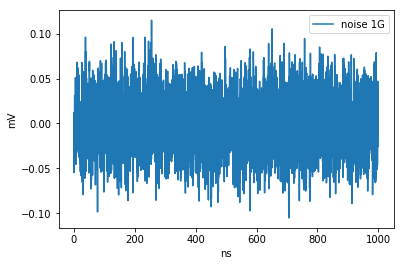

rms : 0.029 mV


In [2]:
t = np.arange(0,1000e-9,100e-12) 

##################################################
##             johnson noise model              ##
##################################################


R = 50
k_B = 1.380649e-23
T  = 300 # K
e_n = np.sqrt(4*k_B*T*R)

noise_bw = 1e9
noise_rms = e_n * np.sqrt(noise_bw)





y = add_noise(t,t*0,rms=noise_rms,bw=noise_bw)



plt.plot(t*1e9,y*1e3,label="noise 1G")

plt.xlabel("ns")
plt.ylabel("mV")
plt.legend()
plt.show()


print("rms : {:3.3f} mV".format(np.std(y)*1e3))

/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:2966: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


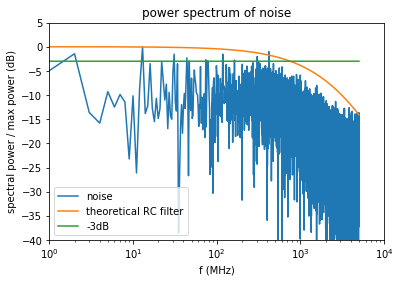

In [3]:
##################################################
##           power spectrum of noise            ##
##################################################

N = len(t)
T = t[1] -t[0]

yf = fft(y/1e-2)
yf = 2.0/N * np.abs(yf[0:N//2])
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

noise_RC = 1/(4*noise_bw)

plt.plot(xf/1e6, dB(yf/np.max(yf)) ,label="noise" )

plt.plot(xf/1e6, 2*dB( 1/(1+xf*noise_RC)),label="theoretical RC filter" )
plt.plot(xf/1e6,xf*0-3,label="-3dB")

plt.xlabel("f (MHz)")
plt.xscale("log")
plt.ylabel("spectral power / max power (dB)")
plt.ylim(-40,5)
plt.title("power spectrum of noise")
plt.xlim(0,10000)
plt.legend()
plt.show()

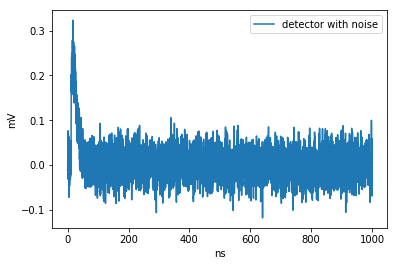

In [4]:
##################################################
##    detector pulse with 50R thermal noise     ##
##################################################



Q = 0.1e-12
tau1 = 5e-9
tau2 = 10e-9
delay = 10e-9

det = detector_signal_function(t, Q, tau1, tau2, delay)
det = add_noise(t,det,rms=noise_rms,bw=noise_bw)

plt.plot(t*1e9,det*1e3,label="detector with noise")

plt.xlabel("ns")
plt.ylabel("mV")
plt.legend()
plt.show()

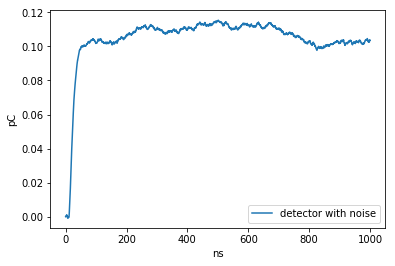

In [5]:
##################################################
##         integrate current to charge          ##
##################################################

# integrate current = voltage/50R
det_int = integrate_dt(t,det/50)

plt.plot(t*1e9,det_int*1e12,label="detector with noise")

plt.xlabel("ns")
plt.ylabel("pC")
plt.legend()
plt.show()

std at 500 ns: 0.009 pC
std at 900 ns: 0.012 pC
the integral is independent of the noise bandwidth!


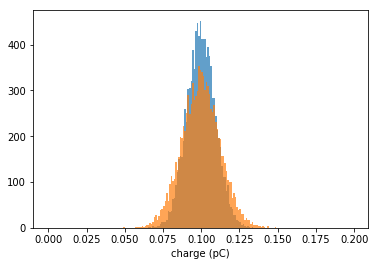

In [6]:
##################################################
##     integral of 1000 pulses after 500 ns     ##
##################################################
Q = 0.1e-12
tau1 = 5e-9
tau2 = 10e-9
delay = 10e-9

det_clean = detector_signal_function(t, Q, tau1, tau2, delay)

mQ500 = []
mQ900 = []

dt = t[1]-t[0]

index_500ns = int(500e-9/dt)
index_900ns = int(900e-9/dt)

for i in range(0,10000):
    
  det = add_noise(t,det_clean,rms=noise_rms,bw=noise_bw)
  
  
  # integrate current = voltage/50R
  det_int = integrate_dt(t,det/50)
  mQ500 += [det_int[index_500ns]]
  mQ900 += [det_int[index_900ns]]
  

mQ500 = np.array(mQ500)
mQ900 = np.array(mQ900)

bins = np.arange(0.0,0.2,0.001)
plt.hist(mQ500*1e12,alpha=0.7,bins=bins)
plt.hist(mQ900*1e12,alpha=0.7,bins=bins)
plt.xlabel("charge (pC)")

print("std at 500 ns: {:3.3f} pC".format(np.std(mQ500)*1e12))
print("std at 900 ns: {:3.3f} pC".format(np.std(mQ900)*1e12))

print("the integral is independent of the noise bandwidth!")